In [226]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [227]:
df=pd.read_excel('C:/Users/VP/Documents/PersonalProjects/LoanPrediction/loan.xlsx')

In [228]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [229]:
df.head() #Shows the first 5 rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [230]:
df.info() #shows the data information which include the total number of colums, their labels, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [231]:
df.isnull().sum() #shows the total number of missing values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [232]:
#Fixing the null values in columns

In [233]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [234]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [235]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [236]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [237]:
df['Property_Area'].fillna(df['Property_Area'].mode()[0], inplace=True)

In [238]:
df.LoanAmount= df.LoanAmount.fillna(df.LoanAmount .mean())

In [239]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [240]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [241]:
df.isnull().sum() #Checking to see if missing values have been taken care of

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory data analysis

In [242]:
df.shape

(614, 13)

In [243]:


# Calculate percentage of missing values in each column
missing_percent = df.isnull().mean() * 100

# Print the percentage of missing values for each column
print("Percentage of missing values in each column:")
print(missing_percent)


Percentage of missing values in each column:
Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64


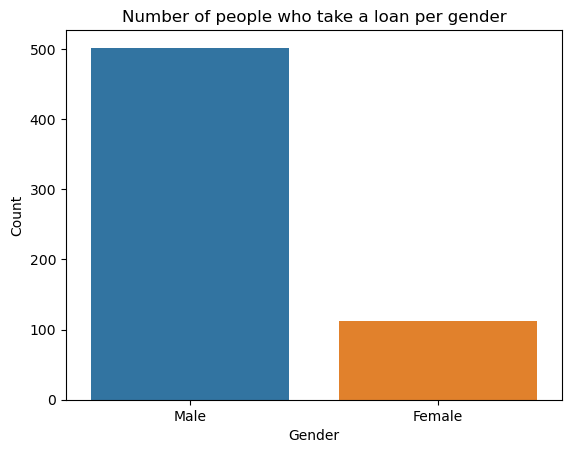

In [244]:
sb.countplot(x='Gender', data=df)

# Set plot labels
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of people who take a loan per gender')

# Show the plot
plt.show()

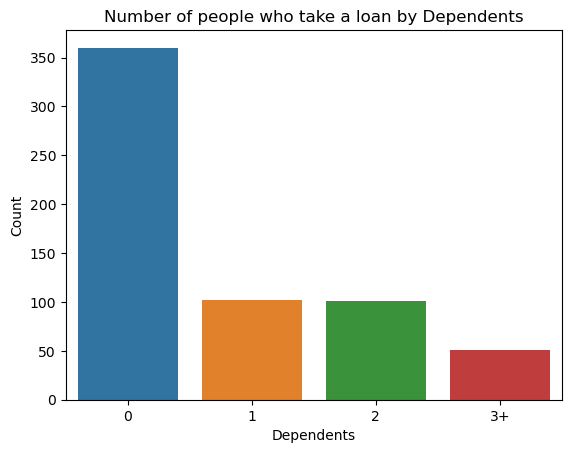

In [245]:
sb.countplot(x='Dependents', data=df)

# Set plot labels
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Number of people who take a loan by Dependents')

# Show the plot
plt.show()

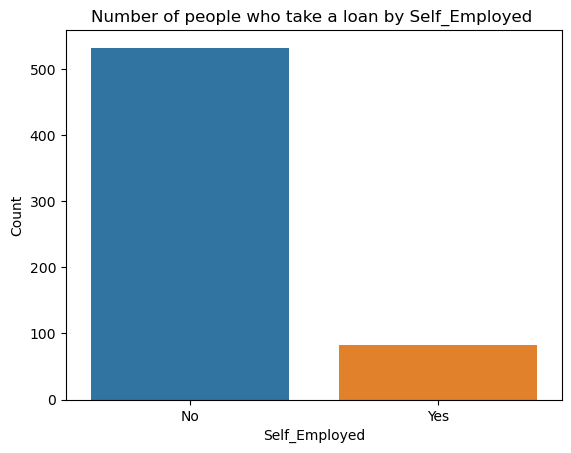

In [246]:
sb.countplot(x='Self_Employed', data=df)

# Set plot labels
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Number of people who take a loan by Self_Employed ')

# Show the plot
plt.show()

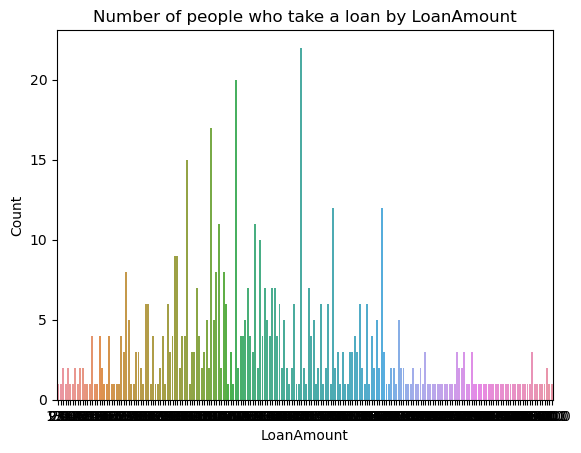

In [247]:
sb.countplot(x='LoanAmount', data=df)

# Set plot labels
plt.xlabel('LoanAmount')
plt.ylabel('Count')
plt.title('Number of people who take a loan by LoanAmount')

# Show the plot
plt.show()

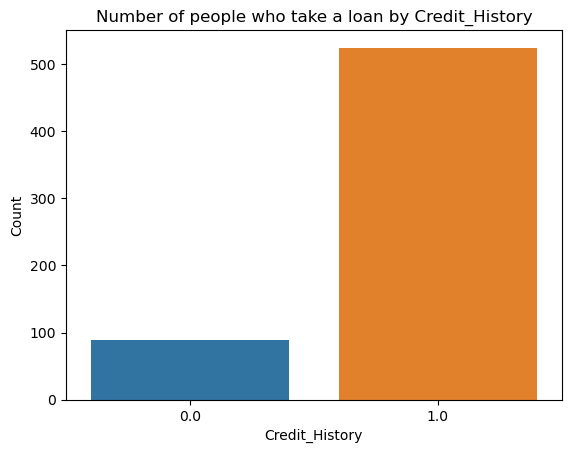

In [248]:
sb.countplot(x='Credit_History', data=df)

# Set plot labels
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title('Number of people who take a loan by Credit_History')

# Show the plot
plt.show()

In [249]:
#Encoding the categorical variable

In [250]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Now, if you want to check the value counts
print(df['Gender'].value_counts())

1    502
0    112
Name: Gender, dtype: int64


In [251]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})

# Now, if you want to check the value counts
print(df['Married'].value_counts())

1    401
0    213
Name: Married, dtype: int64


In [252]:
df['Dependents'] = df['Dependents'].map({0: 0, 1: 1, 2: 2, '3+': 3})

# Now, if you want to check the value counts
print(df['Dependents'].value_counts())

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


In [253]:
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})

# Now, if you want to check the value counts
print(df['Education'].value_counts())

1    480
0    134
Name: Education, dtype: int64


In [254]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Now, if you want to check the value counts
print(df['Loan_Status'].value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


In [255]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

# Now, if you want to check the value counts
print(df['Self_Employed'].value_counts())

0    532
1     82
Name: Self_Employed, dtype: int64


In [256]:
df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Rural': 0, 'Semiurban':1})

# Now, if you want to check the value counts
print(df['Property_Area'].value_counts())

1    233
2    202
0    179
Name: Property_Area, dtype: int64


In [257]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [262]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Corrected typo here
from sklearn import metrics


# Splitting the data into Train and test set

In [263]:
X = df.iloc[1:614,1:12].values
y= df.iloc[1:614,12].values

In [264]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [265]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7934782608695652


In [267]:
print("y_predicted", lr_prediction)
print("y_test", y_test)

y_predicted [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
y_test [1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0]
